### Librerías

In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from  matplotlib.lines import Line2D
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA #Principal Component Analysis
import numpy as np # linear algebra
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import sklearn.metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.neighbors import NearestNeighbors

### Inicialización del Dataset

Iris Flower Dataset: https://www.kaggle.com/datasets/arshid/iris-flower-dataset/data

In [ ]:
#df = pd.read_csv('/content/drive/MyDrive/I - II Ciclo - 2024/IF7103 - Sistemas Expertos/Proyecto/iris_extended.csv')
df = pd.read_csv('data/iris_extended.csv')
df.head()

,species,elevation,soil_type,sepal_length,sepal_width,petal_length,petal_width,sepal_area,petal_area,sepal_aspect_ratio,...,sepal_to_petal_length_ratio,sepal_to_petal_width_ratio,sepal_petal_length_diff,sepal_petal_width_diff,petal_curvature_mm,petal_texture_trichomes_per_mm2,leaf_area_cm2,sepal_area_sqrt,petal_area_sqrt,area_ratios
0,setosa,161.8,sandy,5.16,3.41,1.64,0.26,17.5956,0.4264,1.513196,...,3.146341,13.115385,3.52,3.15,5.33,18.33,53.21,4.194711,0.652993,41.265478
1,setosa,291.4,clay,5.48,4.05,1.53,0.37,22.1940,0.5661,1.353086,...,3.581699,10.945946,3.95,3.68,5.90,20.45,52.53,4.711051,0.752396,39.205087
2,setosa,144.3,sandy,5.10,2.80,1.47,0.38,14.2800,0.5586,1.821429,...,3.469388,7.368421,3.63,2.42,5.66,24.62,50.25,3.778889,0.747395,25.563910
3,setosa,114.6,clay,4.64,3.44,1.53,0.17,15.9616,0.2601,1.348837,...,3.032680,20.235294,3.11,3.27,4.51,22.91,50.85,3.995197,0.510000,61.367166
4,setosa,110.9,loamy,4.85,2.87,1.23,0.26,13.9195,0.3198,1.689895,...,3.943089,11.038462,3.62,2.61,4.03,21.56,40.57,3.730885,0.565509,43.525641


In [ ]:
target = ['species']

X = X=df.drop('species', axis=1) #df[features]
y = df[target] #targets = ['setosa', 'virginica', 'versicolor']

true_labels = y.species.map({'versicolor': 0, 'virginica': 1, 'setosa': 2})
#true_labels = y.species.map({'setosa': 0, 'versicolor': 1, 'virginica': 2})

### Análisis y visualización del dataset

In [ ]:
# Verificar valores únicos en la columna 'soil_type'
unique_values = X['soil_type'].unique()

# Definir diccionario de mapeo
soil_type_map = {'sandy': 2, 'clay': 1, 'loamy': 0} # Loamy, Sandy, Clayey

# Verificar si todos los valores están en el diccionario de mapeo
if set(unique_values).issubset(set(soil_type_map.keys())):
    X.loc[:, 'soil_type'] = X['soil_type'].map(soil_type_map)
    print("Conversión exitosa.")
else:
    print("Error: Algunos valores en 'soil_type' no están en el diccionario de mapeo.")

# Verificar valores únicos en la columna 'soil_type' después del mapeo
print("Valores únicos en 'soil_type' después del mapeo:", X['soil_type'].unique())

Conversión exitosa.
Valores únicos en 'soil_type' después del mapeo: [2 1 0]


In [ ]:
def mostrar_graficos(df, target):
    figure, axes = plt.subplots(5, 2, figsize=(10, 25))
    # For Sine Function

    p1=Line2D([], [], color=sns.color_palette("deep")[0], marker='.', ls='', label='setosa',markersize=10)
    p2=Line2D([], [], color=sns.color_palette("deep")[1], marker='.', ls='', label='versicolor',markersize=10)
    p3=Line2D([], [], color=sns.color_palette("deep")[2], marker='.', ls='', label='virginica',markersize=10)

    # 'elevation x soil_type',
    sns.scatterplot(ax=axes[0, 0], data=df, hue=target, y='soil_type', x='elevation', legend=False)

    # 'sepal_length x sepal_width'
    sns.scatterplot(ax=axes[0, 1], data=df, hue=target, y='petal_length', x='petal_width', legend=False)

    # 'petal_length x petal_width'
    sns.scatterplot(ax=axes[1, 0], data=df, hue=target, y='sepal_length', x='sepal_width', legend=False)

    # 'sepal_area x petal_area'
    sns.scatterplot(ax=axes[1, 1], data=df, hue=target, y='sepal_area', x='petal_area', legend=False)

    # 'sepal_aspect_ratio x petal_aspect_ratio'
    sns.scatterplot(ax=axes[2, 0], data=df, hue=target, y='sepal_aspect_ratio', x='petal_aspect_ratio', legend=False)

    # 'sepal_to_petal_length_ratio x sepal_to_petal_width_ratio'
    sns.scatterplot(ax=axes[2, 1], data=df, hue=target, y='sepal_to_petal_length_ratio', x='sepal_to_petal_width_ratio', legend=False)

    # ''sepal_petal_length_diff x sepal_petal_width_diff','
    sns.scatterplot(ax=axes[3, 0], data=df, hue=target, y='sepal_petal_length_diff', x='sepal_petal_width_diff', legend=False)

    # 'sepal_to_petal_length_ratio x sepal_to_petal_width_ratio'
    sns.scatterplot(ax=axes[3, 1], data=df, hue=target, y='petal_curvature_mm', x='petal_texture_trichomes_per_mm2', legend=False)

    # 'leaf_area_cm2 x sepal_area_sqrt'
    sns.scatterplot(ax=axes[4, 0], data=df, hue=target, y='leaf_area_cm2', x='sepal_area_sqrt', legend=False)

    #'petal_area_sqrt x area_ratios'
    sns.scatterplot(ax=axes[4, 1], data=df, hue=target, y='petal_area_sqrt', x='area_ratios', legend=False)

    plt.figlegend(handles=[p1,p2,p3], loc="right", fontsize=10,bbox_to_anchor=(1.05, 0.5, 0, 0))
    plt.show()

In [ ]:
#mostrar_graficos(df, 'species')

## Normalización y Standarización

In [ ]:
scaler=StandardScaler()
X1 = scaler.fit_transform(X)

## Métricas de Evaluación

### The Elbow Method

In [ ]:
def elbow_Method(X_data, model):
    wcss = []

    if model == "kmeans":
        for k in range(1,10):
            kmeans = KMeans(n_clusters = k, init = 'k-means++', max_iter = 300, n_init = "auto", random_state = 0)
            kmeans.fit(X_data)
            wcss.append(kmeans.inertia_)

        # Elbow curve clearly showing the best k value
        plt.plot(range(1,10),wcss)
        plt.xticks(range(1,10))
        plt.xlabel("Number of Clusters")
        plt.ylabel("WCSS value")
        plt.show()

    elif model == "agglomerative":
        range_n_clusters = range(2, 11)
        inertia = []

        for n_clusters in range_n_clusters:
            # Ajustar Agglomerative Clustering
            linkage_matrix = linkage(X_data, method='ward')
            cluster_labels = fcluster(linkage_matrix, t=n_clusters, criterion='maxclust')

            # Calcular la suma de las distancias intra-clúster
            sum_distances = 0
            for i in range(1, n_clusters + 1):
                cluster_points = X_data[cluster_labels == i]
                centroid = cluster_points.mean(axis=0)
                sum_distances += np.sum((cluster_points - centroid) ** 2)

            inertia.append(sum_distances)

        # Graficar el método del codo
        plt.figure(figsize=(8, 6))
        plt.plot(range_n_clusters, inertia, marker='o')
        plt.xlabel('Número de Clústeres')
        plt.ylabel('Suma de las Distancias Intra-Clúster')
        plt.title('Método del Codo para Agglomerative Clustering')
        plt.show()

### Silhouette Score

El método de la silueta promedio evalúa la calidad de un agrupamiento al medir cuán bien se encuentra cada objeto dentro de su clúster. Una mayor anchura promedio de la silueta indica un mejor agrupamiento. Por lo que, este método calcula la silueta promedio de las observaciones para diferentes valores de k. El número óptimo de clústeres k es aquel que maximiza la silueta promedio en un rango de valores posibles para k.  (Kaufman y Rousseeuw, 1990).

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

def silhouette(X_data, model, eps = 0, min_samples = 0):

    if model == "kmeans":

        for k in range(2,6):

            kmeans = KMeans(n_clusters = k, init = 'k-means++', max_iter = 300, n_init = "auto", random_state = 0).fit(X_data)
            cluster_labels = kmeans.predict(X_data)

            silhouette_avg = silhouette_score(X_data, cluster_labels, metric='euclidean')
            print("Para número de clústeres =", k, "el promedio de silhouette_score es:", silhouette_avg)

    elif model == "dbscan":

        #eps = 3  # Ajusta este valor basado en la gráfica k-distancia
        #min_samples = 5
        score = 0
        best_min_samples = 0
        best_score = -1  # Índice de Silueta varía entre -1 y 1

        eps_range=(0.1, 2.0)
        min_samples_range=(2, 10)

        # Itera sobre diferentes valores de min_samples
        for min_samples in range(min_samples_range[0], min_samples_range[1] + 1):
            clusters = DBSCAN(eps=eps, min_samples=min_samples).fit_predict(X_data)

            # Calcular el índice de silueta, ignorando el ruido etiquetado como -1 si es necesario
            if len(set(clusters)) > 1 and -1 in clusters:
                score = silhouette_score(X_data[clusters != -1], clusters[clusters != -1])
            else:
                score = silhouette_score(X_data, clusters)

            print(f"Para el valor de min_samples: {min_samples} el Índice de Silueta es: {score}")

            # Actualizar el mejor puntaje y el mejor valor de min_samples
            if score > best_score:
                best_score = score
                best_min_samples = min_samples

        print(f"Mejor valor de min_samples: {best_min_samples} con Índice de Silueta: {best_score}")

    elif model == "agglomerative":

        n_clusters = 3  # Ajusta este valor según tu caso
        agglo_model = AgglomerativeClustering(n_clusters=n_clusters)
        cluster_labels = agglo_model.fit_predict(X_data)

        # Verificar si hay más de un cluster válido
        if len(set(cluster_labels)) > 1:
            # Calcular el índice de silueta
            silhouette_avg = silhouette_score(X_data, cluster_labels)
            print(f"{n_clusters} clusters, con Índice de Silueta para Agglomerative Clustering: {silhouette_avg}")
        else:
            # Si solo hay un cluster, el índice de silueta no es válido
            print("No se puede calcular el índice de silueta porque solo hay un clúster válido.")

In [ ]:
def plot_confusion_matrix(y_obs, y_pred):
    # calcular matriz de confusión
    mc = sklearn.metrics.confusion_matrix(y_obs, y_pred)
    # visualizar matriz de confusión
    vis = sklearn.metrics.ConfusionMatrixDisplay(mc)
    vis.plot()

## K-means

In [ ]:
import warnings
warnings.filterwarnings('ignore')

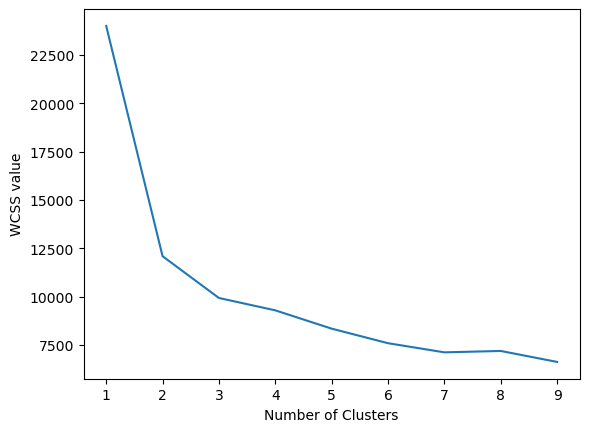

In [ ]:
elbow_Method(X1, "kmeans")

In [ ]:
silhouette(X1, "kmeans")

Para número de clústeres = 2 el promedio de silhouette_score es: 0.45327394262903736
Para número de clústeres = 3 el promedio de silhouette_score es: 0.3039540149947924
Para número de clústeres = 4 el promedio de silhouette_score es: 0.27603686836962
Para número de clústeres = 5 el promedio de silhouette_score es: 0.2513442902005388


In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = "auto", random_state = 0)
predicted_labels = kmeans.fit_predict(X1)

In [ ]:
#contingency_table = pd.crosstab(predicted_labels, y.species)
#print(contingency_table)

In [ ]:
true_labels = y.species.map({'versicolor': 0, 'virginica': 1, 'setosa': 2})

In [ ]:
# Calcula la precisión
#accuracy = accuracy_score(true_labels, predicted_labels)
#print(f'Precisión del K-means: {accuracy}')

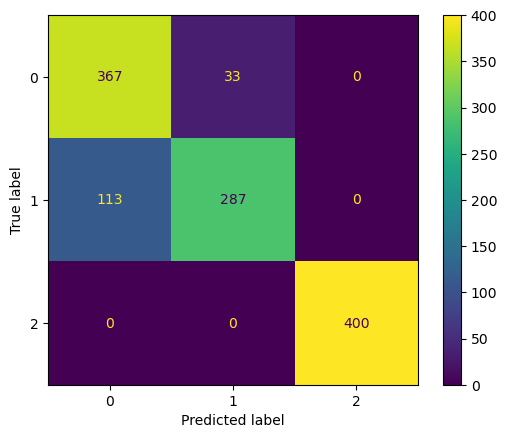

In [ ]:
plot_confusion_matrix(true_labels, predicted_labels)

## K-means con PCA (Principal Component Analysis)

https://www.kaggle.com/code/matteoanzano111/visualizing-high-dimensional-data-pca-and-t-sne

PCA con 5 componentes

In [ ]:
pca_3d = PCA(n_components=5)
X_pca_3d = pca_3d.fit_transform(X1)
components = pca_3d.components_

def varianza_pca(pca_3d):
    #Obtener la varianza explicada por cada componente
    explained_variance_ratio = pca_3d.explained_variance_ratio_

    # Imprimir la varianza explicada por cada componente
    for i, variance in enumerate(explained_variance_ratio, start=1):
        print(f"Varianza explicada por el Componente Principal {i}: {variance:.2%}")

    # Calcular la varianza total explicada por los componentes seleccionados
    total_explained_variance = np.sum(explained_variance_ratio)
    print(f"Varianza total explicada por los {len(explained_variance_ratio)} componentes: {total_explained_variance:.2%}")

In [ ]:
varianza_pca(pca_3d)

Varianza explicada por el Componente Principal 1: 57.22%
Varianza explicada por el Componente Principal 2: 16.36%
Varianza explicada por el Componente Principal 3: 6.91%
Varianza explicada por el Componente Principal 4: 5.27%
Varianza explicada por el Componente Principal 5: 4.30%
Varianza total explicada por los 5 componentes: 90.06%


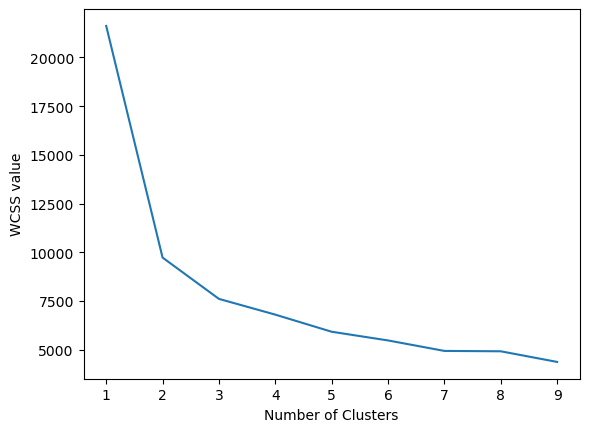

In [ ]:
# Con todas las características
elbow_Method(X_pca_3d, "kmeans")

From the graph you will be able to see that after k value of the line has become stable.

That means 2-3 is the best k value in this case.

In [ ]:
silhouette(X_pca_3d, "kmeans")

Para número de clústeres = 2 el promedio de silhouette_score es: 0.5029863277039418
Para número de clústeres = 3 el promedio de silhouette_score es: 0.35381706410347047
Para número de clústeres = 4 el promedio de silhouette_score es: 0.2781538001407887
Para número de clústeres = 5 el promedio de silhouette_score es: 0.2606307573050106


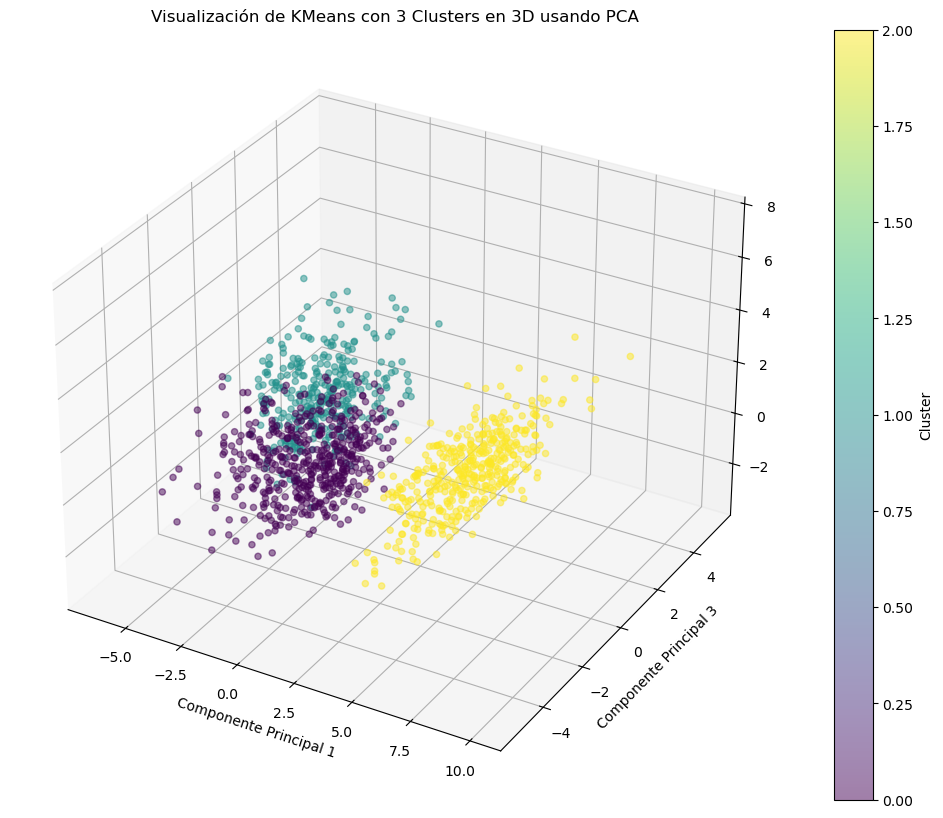

In [ ]:
# Visualizar los clusters en 3D
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=predicted_labels, cmap='viridis', alpha=0.5)
#ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=300, c='red', marker='X')
ax.set_title('Visualización de KMeans con 3 Clusters en 3D usando PCA')
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_ylabel('Componente Principal 3')
plt.colorbar(sc, label='Cluster')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = "auto", random_state = 0)
predicted_labels = kmeans.fit_predict(X_pca_3d)

contingency_table = pd.crosstab(predicted_labels, y.species)
print(contingency_table)

species  setosa  versicolor  virginica
row_0                                 
0             0         355        118
1             0          45        282
2           400           0          0


In [ ]:
true_labels = y.species.map({'versicolor': 0, 'virginica': 1, 'setosa': 2})

In [ ]:
print(f"Exactitud: {accuracy_score(true_labels, predicted_labels):2f}")

Exactitud: 0.864167


In [ ]:
def plot_confusion_matrix(y_obs, y_pred):
    # calcular matriz de confusión
    mc = sklearn.metrics.confusion_matrix(y_obs, y_pred)
    # visualizar matriz de confusión
    vis = sklearn.metrics.ConfusionMatrixDisplay(mc)
    vis.plot()

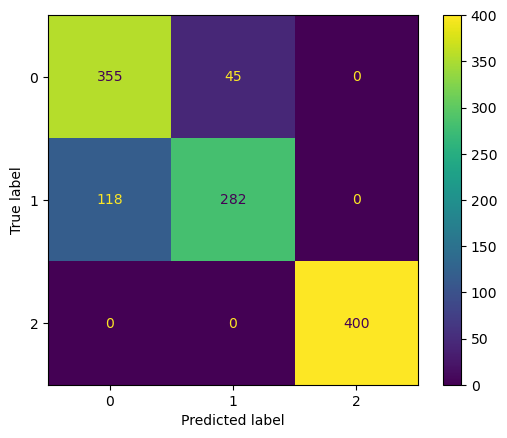

In [ ]:
plot_confusion_matrix(true_labels, predicted_labels)

## Density-Based Spatial Clustering of Applications with Noise (DBSCAN)

The concept behind DBSCAN (Density-Based Spatial Clustering of Applications with Noise) (El Agrupamiento Espacial Basado en Densidad de Aplicaciones con Ruido) is in its name itself — it’s a density-based clustering algorithm. Unlike K-Means, which partitions data into spherical clusters and can misinterpret outliers as small clusters, DBSCAN locates regions of high density and separates them from regions of low density.

DBSCAN is a remarkable clustering algorithm that doesn’t rely on predefining the number of clusters, making it particularly well-suited for finding clusters of varying shapes and sizes in your data.

Here’s how DBSCAN works:

Density-Centered Clustering: DBSCAN identifies clusters by looking at the density of data points. It defines a cluster as a dense region of data points that is separated by areas of lower point density. Core Points: The algorithm starts by selecting a random data point and examines its neighborhood within a specified radius (epsilon, ε). If there are at least a minimum number of data points (minPts) within this neighborhood, it marks the central point as a “core point.”

Growing Clusters: DBSCAN then expands the cluster around this core point by recursively adding nearby points that are also core points. This process continues until no more core points can be added. Border Points: Any data points that are within the neighborhood of a core point but don’t meet the density criteria to be core points themselves are considered “border points” and are assigned to the nearest cluster. Noise: Data points that are not core points or border points and are not within the neighborhood of any core points are treated as noise and do not belong to any cluster.

https://youtu.be/HMis89lGdkA?si=0I8KvQU7UyLeiIJS

https://www.kaggle.com/code/danesmaster/dbscan-iris-dataset

#### ¿Cúal podría ser un buen valor de epsilon?

In [ ]:
min_samples = 3

def epsilon_DBSCAN(X_data, min_samples):
    # Calcular las distancias al k-ésimo vecino más cercano
    neighbors = NearestNeighbors(n_neighbors=min_samples)
    neighbors_fit = neighbors.fit(X_data)
    distances, indices = neighbors_fit.kneighbors(X_data)

    # Ordenar las distancias
    distances = np.sort(distances[:, min_samples-1], axis=0)

    # Graficar las distancias
    plt.plot(distances)
    plt.xlabel('Puntos de datos ordenados')
    plt.ylabel('Distancia al k-ésimo vecino más cercano')
    plt.title('Gráfica de la distancia al k-ésimo vecino más cercano')
    plt.show()

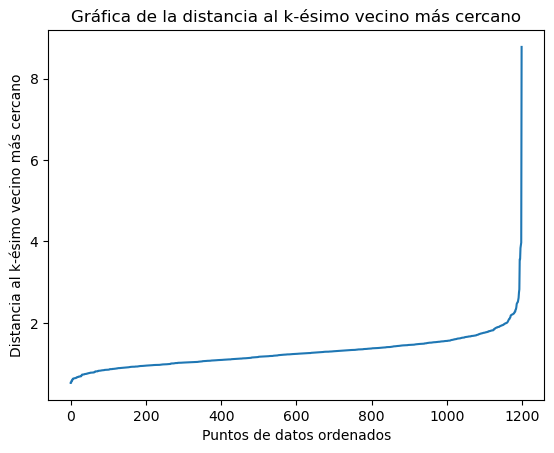

In [ ]:
epsilon_DBSCAN(X1, min_samples = 2)

In [ ]:
def DBSCAN_method(X_data, eps, min_samples):

    clusters = DBSCAN(eps, min_samples=min_samples).fit_predict(X_data)

    print("Etiquetas de clusters:", clusters)

    # Número de clusters encontrados (excluyendo el ruido si está etiquetado como -1)
    n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
    print("Número de clusters encontrados:", n_clusters)

    # Número de puntos considerados como ruido
    n_noise = list(clusters).count(-1)
    print("Número de puntos de ruido:", n_noise)

    return clusters

clusters = DBSCAN_method(X1, eps = 3, min_samples = 2)

Etiquetas de clusters: [0 0 0 ... 1 1 1]
Número de clusters encontrados: 2
Número de puntos de ruido: 6


In [ ]:
contingency_table = pd.crosstab(clusters, y.species)
print(contingency_table)

species  setosa  versicolor  virginica
row_0                                 
-1            6           0          0
 0          394           0          0
 1            0         400        400


In [ ]:
#true_labels = y.species.map({'versicolor': 0, 'virginica': 1, 'setosa': 2})
true_labels = y.species.map({'setosa': 0, 'versicolor': 1, 'virginica': 1})

print("Exactitud:", accuracy_score(clusters, true_labels))

Exactitud: 0.995


In [ ]:
true_labels = y.species.map({'setosa': 0, 'versicolor': 2, 'virginica': 1})

print("Exactitud:", accuracy_score(clusters, true_labels))

Exactitud: 0.6616666666666666


In [ ]:
silhouette(X1, "dbscan", eps = 3, min_samples = 2)

Para el valor de min_samples: 2 el Índice de Silueta es: 0.4532285454024128
Para el valor de min_samples: 3 el Índice de Silueta es: 0.4532285454024128
Para el valor de min_samples: 4 el Índice de Silueta es: 0.4532285454024128
Para el valor de min_samples: 5 el Índice de Silueta es: 0.4532285454024128
Para el valor de min_samples: 6 el Índice de Silueta es: 0.4532285454024128
Para el valor de min_samples: 7 el Índice de Silueta es: 0.4532285454024128
Para el valor de min_samples: 8 el Índice de Silueta es: 0.4532285454024128
Para el valor de min_samples: 9 el Índice de Silueta es: 0.4532285454024128
Para el valor de min_samples: 10 el Índice de Silueta es: 0.4532285454024128
Mejor valor de min_samples: 2 con Índice de Silueta: 0.4532285454024128


## DBSCAN con PCA

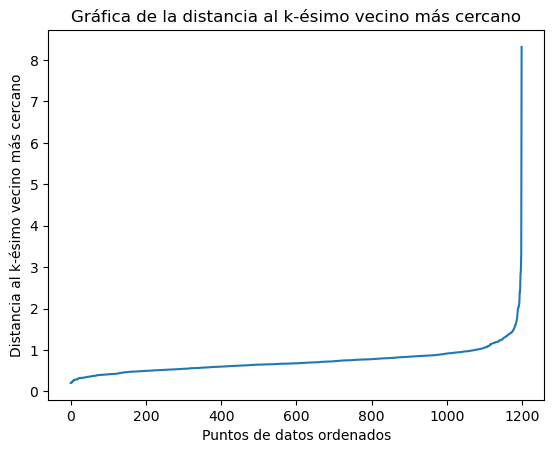

In [ ]:
epsilon_DBSCAN(X_pca_3d, min_samples = 2)

In [ ]:
silhouette(X_pca_3d, "dbscan", eps = 2, min_samples = 3)

Para el valor de min_samples: 2 el Índice de Silueta es: 0.503790031418806
Para el valor de min_samples: 3 el Índice de Silueta es: 0.503790031418806
Para el valor de min_samples: 4 el Índice de Silueta es: 0.503790031418806
Para el valor de min_samples: 5 el Índice de Silueta es: 0.503790031418806
Para el valor de min_samples: 6 el Índice de Silueta es: 0.503790031418806
Para el valor de min_samples: 7 el Índice de Silueta es: 0.503790031418806
Para el valor de min_samples: 8 el Índice de Silueta es: 0.503790031418806
Para el valor de min_samples: 9 el Índice de Silueta es: 0.5037078939701939
Para el valor de min_samples: 10 el Índice de Silueta es: 0.5037078939701939
Mejor valor de min_samples: 2 con Índice de Silueta: 0.503790031418806


In [ ]:
clusters_pca = DBSCAN_method(X_pca_3d, 2, 3)

Etiquetas de clusters: [0 0 0 ... 1 1 1]
Número de clusters encontrados: 2
Número de puntos de ruido: 10


In [ ]:
true_labels = y.species.map({'setosa': 0, 'versicolor': 1, 'virginica': 2})
print("Exactitud:", accuracy_score(clusters_pca, true_labels))

Exactitud: 0.6591666666666667


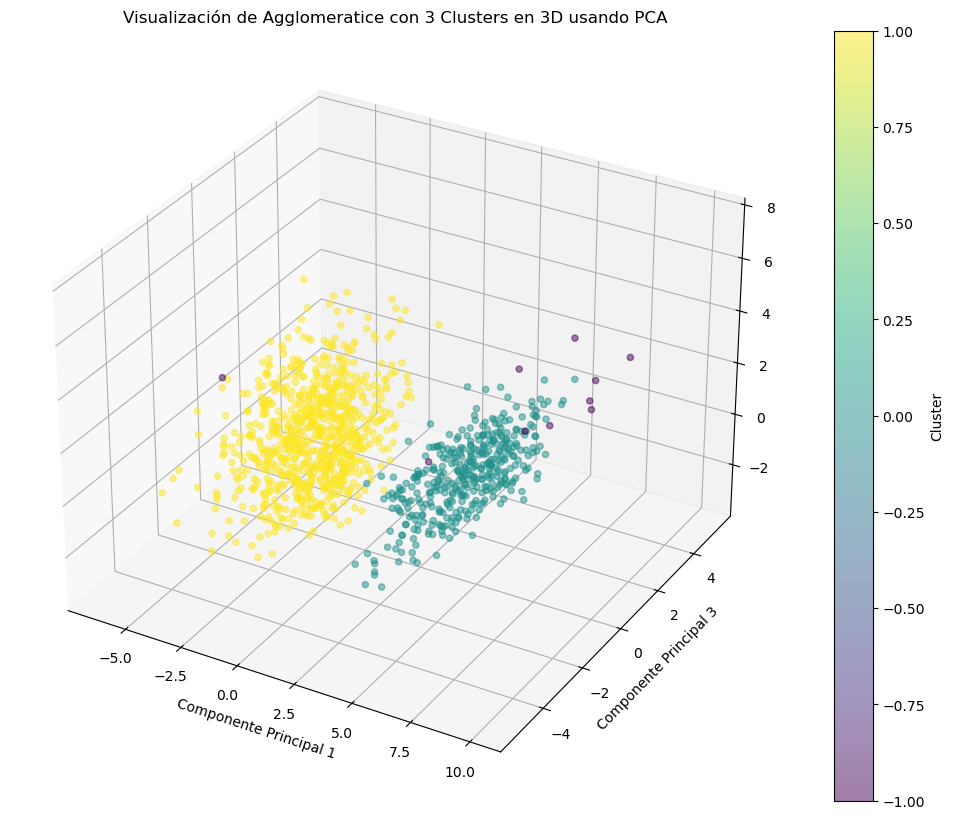

In [ ]:
# Visualizar los clusters en 3D
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=clusters_pca, cmap='viridis', alpha=0.5)
#ax.scatter(kmeans.cluster_centers_[:, 0], aggloclust.cluster_centers_[:, 1], aggloclust.cluster_centers_[:, 2], s=300, c='red', marker='X')
ax.set_title('Visualización de Agglomeratice con 3 Clusters en 3D usando PCA')
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_ylabel('Componente Principal 3')
plt.colorbar(sc, label='Cluster')
plt.show()

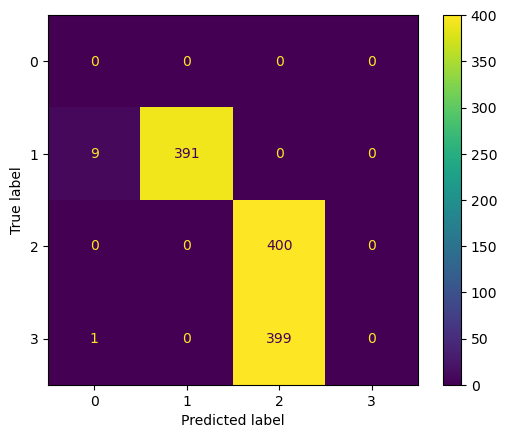

In [ ]:
plot_confusion_matrix(true_labels, clusters_pca)

## Agglomerative Clustering

Agglomerative Clustering is a hierarchical clustering technique used in Python to group similar data points into clusters. Hierarchical clustering can apply either a 'top-down' or 'bottom-up' approach to cluster observational data. Agglomerative is a hierarchical clustering method that utilizes the 'bottom-up' approach to group elements in a dataset. In this method, each element initially forms its own cluster and gradually merges with other clusters based on specific criteria.

Agglomerative Clustering es una técnica de clusterización jerarquica, las agrupaciones decisivas y aglomerativas (Agglomerative Clustering), consiste en que cada punto empieza siendo un cluster y en cada interación se fusionan los clusters más próximos. Tal como se explica a continuación:
.
Tal como se explica a continuación:
1) Calcular la matriz de proximidad.
2) Repetir hasta que solo quede un cluster:
    • Unir los dos clusters más próximos.
    • Actualizar la matriz de matriz de proximidad con el nuevo cluster.

https://youtu.be/k1ZU51B-33k?si=y0s-FPlhKvkbdZCm

Código: https://www.datatechnotes.com/2019/10/agglomerative-clustering-example-in.html

In [ ]:
# Import necessary libraries
from sklearn.cluster import AgglomerativeClustering

In [ ]:
silhouette(X1, "agglomerative")

3 clusters, con Índice de Silueta para Agglomerative Clustering: 0.27913057731216073


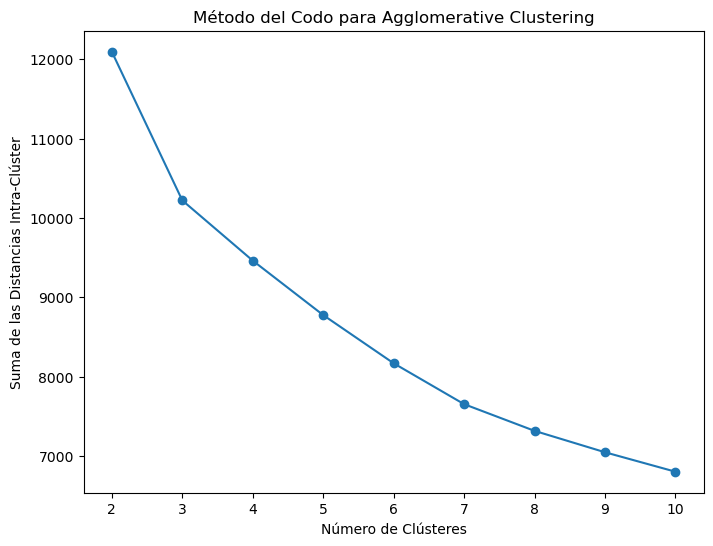

In [ ]:
elbow_Method(X1, "agglomerative")

In [ ]:
# Initialize and fit an Agglomerative Clustering model with 5 clusters
#aggloclust = AgglomerativeClustering(n_clusters=5).fit(X1)
aggloclust = AgglomerativeClustering(n_clusters=3).fit_predict(X1)
#print(aggloclust)

contingency_table = pd.crosstab(aggloclust, y.species)
print(contingency_table)

species  setosa  versicolor  virginica
row_0                                 
0             0           4        377
1           400           0          0
2             0         396         23


In [ ]:
true_labels = y.species.map({'setosa': 1, 'versicolor': 2, 'virginica': 0})
print("Exactitud:", sklearn.metrics.accuracy_score(aggloclust, true_labels))

Exactitud: 0.9775


## Agglomerative Clustering con PCA

In [ ]:
silhouette(X_pca_3d, "agglomerative")

3 clusters, con Índice de Silueta para Agglomerative Clustering: 0.34191778431106956


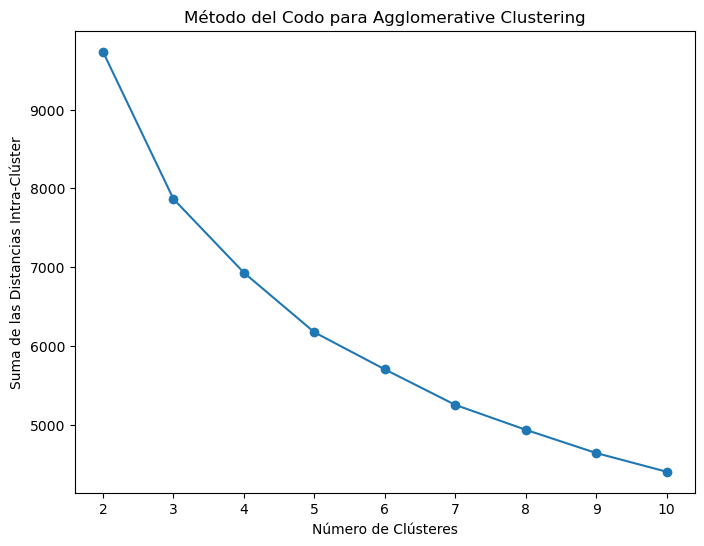

In [ ]:
elbow_Method(X_pca_3d, "agglomerative")

In [ ]:
# Initialize and fit an Agglomerative Clustering model with 5 clusters
aggloclust_pca = AgglomerativeClustering(n_clusters=3).fit_predict(X_pca_3d)
#print(aggloclust_pca)

contingency_table = pd.crosstab(aggloclust_pca, y.species)
print(contingency_table)

species  setosa  versicolor  virginica
row_0                                 
0             0         399        138
1           400           0          0
2             0           1        262


In [ ]:
true_labels = y.species.map({'setosa': 1, 'versicolor': 0, 'virginica': 2})

print("Exactitud:", accuracy_score(aggloclust_pca, true_labels))

Exactitud: 0.8841666666666667


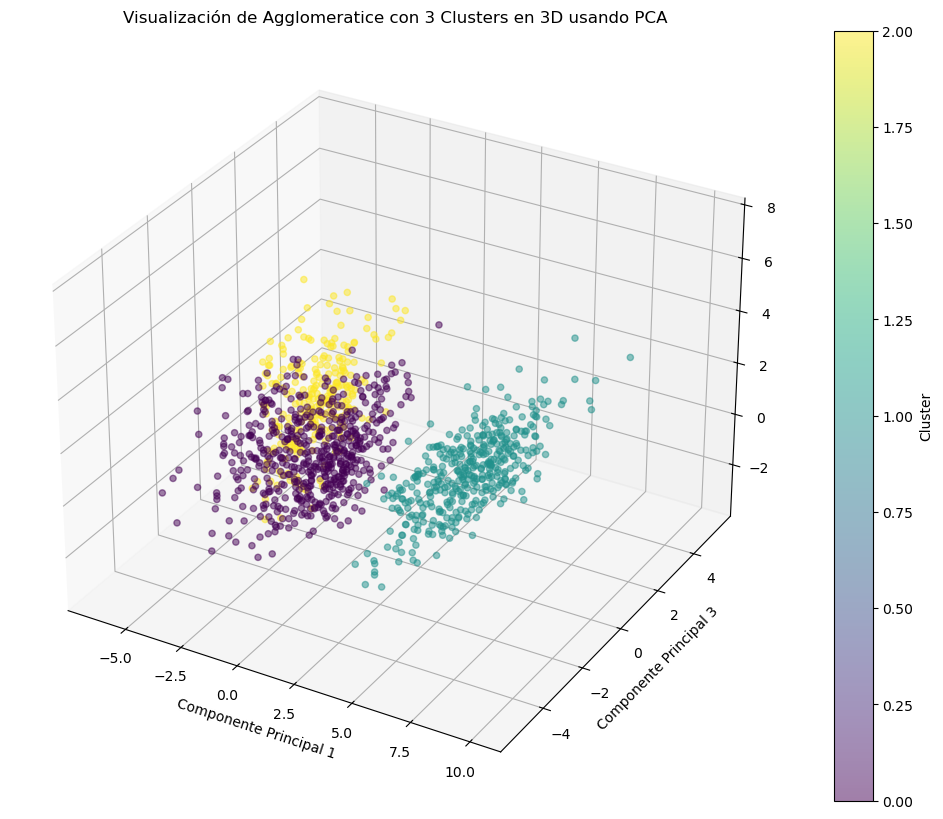

In [ ]:
# Visualizar los clusters en 3D
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=aggloclust_pca, cmap='viridis', alpha=0.5)
#ax.scatter(kmeans.cluster_centers_[:, 0], aggloclust.cluster_centers_[:, 1], aggloclust.cluster_centers_[:, 2], s=300, c='red', marker='X')
ax.set_title('Visualización de Agglomeratice con 3 Clusters en 3D usando PCA')
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_ylabel('Componente Principal 3')
plt.colorbar(sc, label='Cluster')
plt.show()

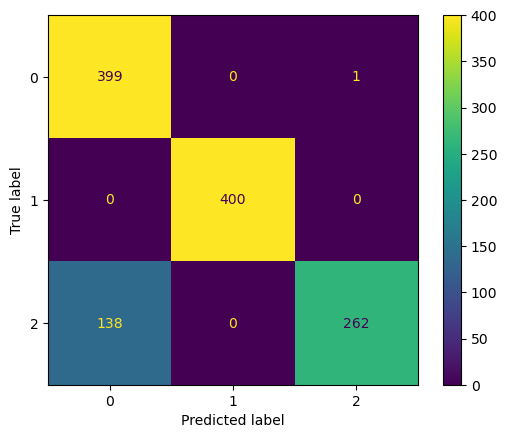

In [ ]:
plot_confusion_matrix(true_labels, aggloclust_pca)

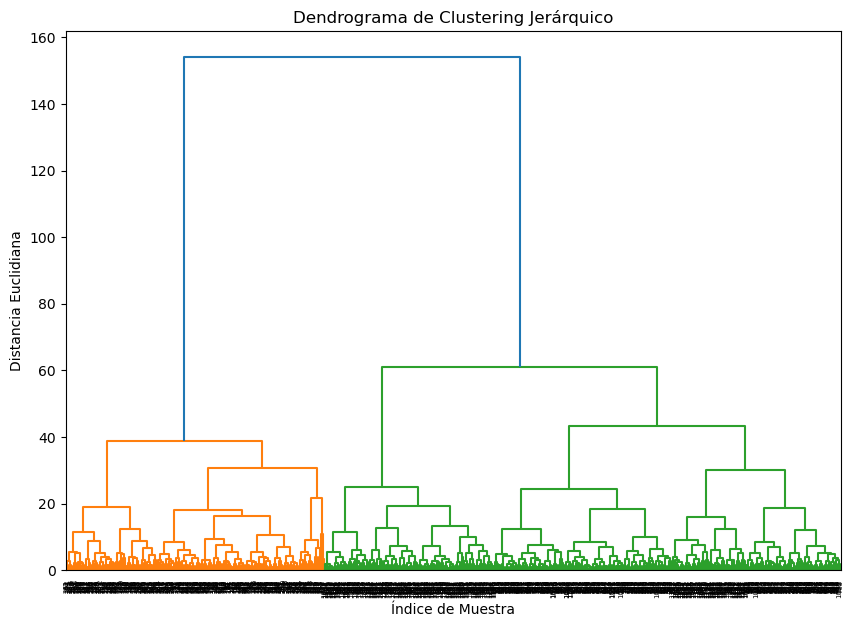

In [ ]:
Z = linkage(X_pca_3d, method='ward')  # El método 'ward' minimiza la varianza dentro de cada grupo

# Crear el dendrograma
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title("Dendrograma de Clustering Jerárquico")
plt.xlabel("Índice de Muestra")
plt.ylabel("Distancia Euclidiana")
plt.show()

### K-FOLDS & K-MEANS

In [ ]:
def train_kmeans(X_data, y_true, num_folds, num_k):

    kf = KFold(n_splits = num_folds) # kf = KFold(n_splits=5, shuffle=True, random_state=42)
    train_accuracies = []
    test_accuracies = []
    std_accuracy_train = []
    std_accuracy_train = []

    for train_index, test_index in kf.split(X_data):

        X_train, X_test = X_data[train_index], X_data[test_index]
        y_train, y_test = y_true[train_index], y_true[test_index]

        kmeans = KMeans(n_clusters = num_k, init = 'k-means++', max_iter = 300, n_init = "auto", random_state = 0)

        # -------------------------- K-mean Train -------------------------
        y_pred_train = kmeans.fit_predict(X_train)

        contingency_table = pd.crosstab(y_pred_train, y_train)

        # Determinar el mapeo de clúster a clase dinámicamente
        cluster_to_class = {}
        for cluster in contingency_table.index:
            cluster_to_class[cluster] = contingency_table.loc[cluster].idxmax()

        # Modificar y_pred_train con el mapeo
        y_pred_train_mapped = np.vectorize(cluster_to_class.get)(y_pred_train)

        # Calcular la precisión para el conjunto de entrenamiento
        train_accuracy = accuracy_score(y_train, y_pred_train_mapped)
        train_accuracies.append(train_accuracy)

        # --------------------------- K-mean Test -------------------------
        y_pred_test = kmeans.fit_predict(X_test)

        contingency_table = pd.crosstab(y_pred_test, y_test)

        cluster_to_class = {}
        for cluster in contingency_table.index:
            cluster_to_class[cluster] = contingency_table.loc[cluster].idxmax()

        y_pred_test_mapped = np.vectorize(cluster_to_class.get)(y_pred_test)

        test_accuracy = accuracy_score(y_test, y_pred_test_mapped)
        test_accuracies.append(test_accuracy)

    average_accuracy_train = np.mean(train_accuracies)
    average_accuracy_test = np.mean(test_accuracies)

    # Calcular la desviación estándar
    std_accuracy_train = np.std(train_accuracies, ddof=1)
    std_accuracy_test = np.std(test_accuracies, ddof=1)

    return average_accuracy_train, average_accuracy_test, std_accuracy_train, std_accuracy_test

In [ ]:
num_folds = 5
true_labels = y.species.map({'versicolor': 0, 'virginica': 1, 'setosa': 2})
y_true = np.array(true_labels)

In [ ]:
average_accuracy_train, average_accuracy_test, std_accuracy_train, std_accuracy_test = train_kmeans(X1, y_true, num_folds = 5, num_k = 3)

print("K-fold con K-means")
print(f"Precisión Promedio en Entrenamiento: {average_accuracy_train:.2f}")
print(f"Precisión Promedio en Prueba: {average_accuracy_test:.2f}")

print(f"Desviación estándar de la precisión de entrenamiento: {std_accuracy_train:.4f}")
print(f"Desviación estándar de la precisión de prueba: {std_accuracy_test:.4f}")

K-fold con K-means
Precisión Promedio en Entrenamiento: 0.83
Precisión Promedio en Prueba: 0.98
Desviación estándar de la precisión de entrenamiento: 0.0463
Desviación estándar de la precisión de prueba: 0.0429


In [ ]:
average_accuracy_train, average_accuracy_test, std_accuracy_train, std_accuracy_test  = train_kmeans(X_pca_3d, y_true, num_folds = 5, num_k = 3)

print("K-fold con K-means y PCA")
print(f"Precisión Promedio en Entrenamiento: {average_accuracy_train:.2f}")
print(f"Precisión Promedio en Prueba: {average_accuracy_test:.2f}")

print(f"Desviación estándar de la precisión de entrenamiento: {std_accuracy_train:.4f}")
print(f"Desviación estándar de la precisión de prueba: {std_accuracy_test:.4f}")

K-fold con K-means y PCA
Precisión Promedio en Entrenamiento: 0.86
Precisión Promedio en Prueba: 0.98
Desviación estándar de la precisión de entrenamiento: 0.0249
Desviación estándar de la precisión de prueba: 0.0410


### K-FOLDS & DBSCAN

In [ ]:
def assign_labels_dynamically(cluster_labels, y_true):
    unique_labels_y = np.unique(y_true)
    unique_clusters = np.unique(cluster_labels)

    # Calcular matriz de contingencia
    contingency_table = pd.crosstab(cluster_labels, y_true)

    # Inicializar diccionario para mapeo de cluster a etiqueta
    cluster_to_label = {}

    # Asignar etiquetas a cada cluster, ignorando el ruido (cluster == -1)
    for cluster in unique_clusters:
        if cluster == -1:
            continue

        # Obtener las etiquetas en el cluster actual
        labels_in_cluster = contingency_table.loc[cluster].idxmax()

        # Asignar la etiqueta con más ocurrencias en el cluster actual
        cluster_to_label[cluster] = labels_in_cluster

    # Asegurar que cada cluster tenga una asignación única de etiqueta
    assigned_labels = np.array([cluster_to_label.get(cluster, -1) for cluster in cluster_labels])

    return assigned_labels

In [ ]:
def train_DBSCAN(X_data, y_true, num_folds, num_eps, param_msamples):
    kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
    train_accuracies = []
    test_accuracies = []
    std_accuracy_train = []
    std_accuracy_train = []

    for train_index, test_index in kf.split(X_data):
        X_train, X_test = X_data[train_index], X_data[test_index]
        y_train, y_test = y_true[train_index], y_true[test_index]

        dbscan_model = DBSCAN(eps=num_eps, min_samples=param_msamples)

        # -------------------------- DBSCAN Train -------------------------
        y_pred_train = dbscan_model.fit_predict(X_train)

        # Assign labels to clusters dynamically
        assigned_labels = assign_labels_dynamically(y_pred_train, y_train)

        # Calculate accuracy for training set
        train_accuracy = accuracy_score(y_train, assigned_labels)
        train_accuracies.append(train_accuracy)

        # -------------------------- DBSCAN Train -------------------------
        y_pred_test = dbscan_model.fit_predict(X_test)

        # Assign labels to clusters dynamically
        assigned_labels = assign_labels_dynamically(y_pred_test, y_test)

        # Calculate accuracy for training set
        test_accuracy = accuracy_score(y_test, assigned_labels)
        test_accuracies.append(test_accuracy)

    average_accuracy_train = np.mean(train_accuracies)
    average_accuracy_test = np.mean(test_accuracies)

    # Calcular la desviación estándar
    std_accuracy_train = np.std(train_accuracies, ddof=1)
    std_accuracy_test = np.std(test_accuracies, ddof=1)

    return average_accuracy_train, average_accuracy_test, std_accuracy_train, std_accuracy_test

In [ ]:
true_labels = y.species.map({'versicolor': 0, 'virginica': 1, 'setosa': 2})
y_true = np.array(true_labels)

In [ ]:
average_accuracy_train, average_accuracy_test, std_accuracy_train, std_accuracy_test = train_DBSCAN(X1, y_true, num_folds = 5, num_eps = 3, param_msamples = 2)
print("K-fold con DBSCAN")

print(f"Precisión Promedio en Entrenamiento: {average_accuracy_train:.4f}")
print(f"Precisión Promedio en Prueba: {average_accuracy_test:.4f}")

print(f"Desviación estándar de la precisión de entrenamiento: {std_accuracy_train:.4f}")
print(f"Desviación estándar de la precisión de prueba: {std_accuracy_test:.4f}")

K-fold con DBSCAN
Precisión Promedio en Entrenamiento: 0.6669
Precisión Promedio en Prueba: 0.6800
Desviación estándar de la precisión de entrenamiento: 0.0045
Desviación estándar de la precisión de prueba: 0.0190


In [ ]:
average_accuracy_train, average_accuracy_test, std_accuracy_train, std_accuracy_test = train_DBSCAN(X_pca_3d, y_true, num_folds = 5, num_eps = 2, param_msamples = 3) #3

print("K-fold con DBSCAN y PCA")
print(f"Precisión Promedio en Entrenamiento: {average_accuracy_train:.2f}")
print(f"Precisión Promedio en Prueba: {average_accuracy_test:.2f}")

print(f"Desviación estándar de la precisión de entrenamiento: {std_accuracy_train:.4f}")
print(f"Desviación estándar de la precisión de prueba: {std_accuracy_test:.4f}")

K-fold con DBSCAN y PCA
Precisión Promedio en Entrenamiento: 0.66
Precisión Promedio en Prueba: 0.66
Desviación estándar de la precisión de entrenamiento: 0.0052
Desviación estándar de la precisión de prueba: 0.0212


### K-FOLDS & AGGLOMERATIVE

In [ ]:
def train_Agglomerative(X_data, y_true, num_folds, num_k):

    kf = KFold(n_splits = num_folds) # kf = KFold(n_splits=5, shuffle=True, random_state=42)
    train_accuracies = []
    test_accuracies = []
    std_accuracy_train = []
    std_accuracy_train = []

    for train_index, test_index in kf.split(X_data):

        X_train, X_test = X_data[train_index], X_data[test_index]
        y_train, y_test = y_true[train_index], y_true[test_index]


        # -------------------------- Agglomerative Train -------------------------
        y_pred_train = AgglomerativeClustering(n_clusters=num_k).fit_predict(X_train)
        contingency_table = pd.crosstab(y_pred_train, y_train)

        # Determinar el mapeo de clúster a clase dinámicamente
        cluster_to_class = {}
        for cluster in contingency_table.index:
            cluster_to_class[cluster] = contingency_table.loc[cluster].idxmax()

        # Modificar y_pred_train con el mapeo
        y_pred_train_mapped = np.vectorize(cluster_to_class.get)(y_pred_train)

        # Calcular la precisión para el conjunto de entrenamiento
        train_accuracy = accuracy_score(y_train, y_pred_train_mapped)
        train_accuracies.append(train_accuracy)

        # --------------------------- Agglomerative Test -------------------------
        y_pred_test = AgglomerativeClustering(n_clusters=num_k).fit_predict(X_test)
        contingency_table = pd.crosstab(y_pred_test, y_test)

        cluster_to_class = {}
        for cluster in contingency_table.index:
            cluster_to_class[cluster] = contingency_table.loc[cluster].idxmax()

        y_pred_test_mapped = np.vectorize(cluster_to_class.get)(y_pred_test)

        test_accuracy = accuracy_score(y_test, y_pred_test_mapped)
        test_accuracies.append(test_accuracy)

    average_accuracy_train = np.mean(train_accuracies)
    average_accuracy_test = np.mean(test_accuracies)

    # Calcular la desviación estándar
    std_accuracy_train = np.std(train_accuracies, ddof=1)
    std_accuracy_test = np.std(test_accuracies, ddof=1)

    return average_accuracy_train, average_accuracy_test, std_accuracy_train, std_accuracy_test

In [ ]:
true_labels = y.species.map({'versicolor': 0, 'virginica': 1, 'setosa': 2})
y_true = np.array(true_labels)

In [ ]:
average_accuracy_train, average_accuracy_test, std_accuracy_train, std_accuracy_test = train_Agglomerative(X1, y_true, num_folds = 5, num_k = 3)

print("K-fold con Agglomerative")

print(f"Precisión Promedio en Entrenamiento: {average_accuracy_train:.4f}")
print(f"Precisión Promedio en Prueba: {average_accuracy_test:.4f}")

print(f"Desviación estándar de la precisión de entrenamiento: {std_accuracy_train:.4f}")
print(f"Desviación estándar de la precisión de prueba: {std_accuracy_test:.4f}")

K-fold con Agglomerative
Precisión Promedio en Entrenamiento: 0.9340
Precisión Promedio en Prueba: 0.9958
Desviación estándar de la precisión de entrenamiento: 0.0646
Desviación estándar de la precisión de prueba: 0.0093


In [ ]:
average_accuracy_train, average_accuracy_test, std_accuracy_train, std_accuracy_test = train_Agglomerative(X_pca_3d, y_true, num_folds = 5, num_k = 3)

print("K-fold con Agglomerative y PCA")
print(f"Precisión Promedio en Entrenamiento: {average_accuracy_train:.4f}")
print(f"Precisión Promedio en Prueba: {average_accuracy_test:.4f}")

print(f"Desviación estándar de la precisión de entrenamiento: {std_accuracy_train:.4f}")
print(f"Desviación estándar de la precisión de prueba: {std_accuracy_test:.4f}")

K-fold con Agglomerative y PCA
Precisión Promedio en Entrenamiento: 0.8827
Precisión Promedio en Prueba: 0.9700
Desviación estándar de la precisión de entrenamiento: 0.0377
Desviación estándar de la precisión de prueba: 0.0671
